# Udacity Data Wrangling Project: WeRateDogs Twitter Data

### Load Liabraries

In [1]:
# load libraries
import pandas as pd
import numpy as np
import requests
import tweepy
import json
import time
import os
import datetime
import string
import matplotlib.pyplot as plt
import math
import seaborn as sns

## Data Gathering

### Import twitter archive

In [2]:
# load twitter-archive-enhanced.csv
archive = pd.read_csv('twitter-archive-enhanced.csv', encoding="utf-8")
archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


### Download tweet image prediction data

In [3]:
# import and saving Data programatically 
url='https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

open('image_prediction.tsv', 'wb').write(response.content)

335079

In [4]:
# load image_prediction.tsv
predictions = pd.read_csv('image_prediction.tsv', sep='\t')
predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


I do not have twitter developer account. So I am downloading twitter_json.txt from Udacity.

### Twitter API and JSON

In [5]:
tweet_ids = archive.tweet_id.values

In [6]:
df_tweets = []
dict_tweets = {}
with open('tweet_json.txt') as json_file:
    # data = json.loads(json_file)
    for line in json_file:
        data = json.loads(line)
        df_tweets.append({'tweet_id': data['id'],
                        'retweet_count': data['retweet_count'],
                        'favorite_count': data['favorite_count']})

In [7]:
# create dataframe
df_api = pd.DataFrame(df_tweets, columns= ['tweet_id',
                                           'retweet_count',
                                           'favorite_count'])

In [8]:
df_api.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


In [9]:
# create .csv file for api dataframe
df_api.to_csv('df_tweets.csv')

## Data Assessment
In this section, I will assess data with the aid of visual assessment and programatic assessment.

In [10]:
archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [11]:
predictions

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [12]:
df_api

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048
5,891087950875897856,3261,20562
6,890971913173991426,2158,12041
7,890729181411237888,16716,56848
8,890609185150312448,4429,28226
9,890240255349198849,7711,32467


### Visual Assessment

#### Archive 
 - All dog names are not filled
 - Few columns have missing values
 - Dataset have multiple columns for dogtype like columns doggo, floofer, pupper, puppo
 - text column contains name and url 

#### Prdictions
> Prediction present in different columns, which can be merge into single column

#### API
> This dataset columns could be merge with the archive dataframe


#### Archive Dataframe assessment

In [13]:
archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [14]:
archive.tail()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,None,None,None


In [15]:
archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [16]:
archive.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [17]:
archive.tweet_id.nunique()

2356

In [18]:
archive['name'].value_counts()

None          745
a              55
Charlie        12
Oliver         11
Cooper         11
Lucy           11
Tucker         10
Penny          10
Lola           10
Winston         9
Bo              9
the             8
Sadie           8
Toby            7
Bailey          7
Daisy           7
an              7
Buddy           7
Jax             6
Dave            6
Bella           6
Jack            6
Stanley         6
Koda            6
Oscar           6
Rusty           6
Scout           6
Milo            6
Leo             6
Finn            5
             ... 
Sprout          1
Jett            1
Fynn            1
Aubie           1
Carbon          1
incredibly      1
Ronnie          1
Goose           1
Koko            1
Clifford        1
Fillup          1
Iroh            1
Jaycob          1
Doobert         1
Boots           1
Jeffri          1
Dewey           1
Emanuel         1
Sprinkles       1
Snickers        1
Dante           1
Longfellow      1
my              1
Huxley          1
Lizzie    

In [19]:
(archive.loc[:, 'doggo':'puppo'] == 'None').sum()

doggo      2259
floofer    2346
pupper     2099
puppo      2326
dtype: int64

In [20]:
archive.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [21]:
archive.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [22]:
archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


#### Predictions Dataframe assessment

In [23]:
predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [24]:
predictions.tail()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2074,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False


In [25]:
predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [26]:
predictions.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [27]:
predictions[predictions.tweet_id.duplicated()]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [28]:
predictions.p1.value_counts()

golden_retriever             150
Labrador_retriever           100
Pembroke                      89
Chihuahua                     83
pug                           57
chow                          44
Samoyed                       43
toy_poodle                    39
Pomeranian                    38
malamute                      30
cocker_spaniel                30
French_bulldog                26
Chesapeake_Bay_retriever      23
miniature_pinscher            23
seat_belt                     22
German_shepherd               20
Staffordshire_bullterrier     20
Siberian_husky                20
Cardigan                      19
web_site                      19
teddy                         18
Shetland_sheepdog             18
Maltese_dog                   18
beagle                        18
Eskimo_dog                    18
Rottweiler                    17
Lakeland_terrier              17
Shih-Tzu                      17
kuvasz                        16
Italian_greyhound             16
          

In [29]:
predictions.p2.value_counts()

Labrador_retriever                104
golden_retriever                   92
Cardigan                           73
Chihuahua                          44
Pomeranian                         42
Chesapeake_Bay_retriever           41
French_bulldog                     41
toy_poodle                         37
cocker_spaniel                     34
Siberian_husky                     33
miniature_poodle                   33
beagle                             28
Eskimo_dog                         27
collie                             27
Pembroke                           27
kuvasz                             26
Italian_greyhound                  22
American_Staffordshire_terrier     21
Pekinese                           21
toy_terrier                        20
Samoyed                            20
miniature_pinscher                 20
malinois                           20
chow                               20
Norwegian_elkhound                 19
Boston_bull                        19
Staffordshir

In [30]:
predictions.p3.value_counts()

Labrador_retriever                79
Chihuahua                         58
golden_retriever                  48
Eskimo_dog                        38
kelpie                            35
kuvasz                            34
chow                              32
Staffordshire_bullterrier         32
cocker_spaniel                    31
beagle                            31
toy_poodle                        29
Pomeranian                        29
Pekinese                          29
Pembroke                          27
Great_Pyrenees                    27
Chesapeake_Bay_retriever          27
French_bulldog                    26
malamute                          26
American_Staffordshire_terrier    24
Cardigan                          23
pug                               23
basenji                           21
bull_mastiff                      20
toy_terrier                       20
Siberian_husky                    19
Shetland_sheepdog                 17
Boston_bull                       17
d

#### API dataframe assessment

In [31]:
df_api.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


In [32]:
df_api.tail()

,tweet_id,retweet_count,favorite_count
2349,666049248165822465,41,111
2350,666044226329800704,147,311
2351,666033412701032449,47,128
2352,666029285002620928,48,132
2353,666020888022790149,532,2535


In [33]:
df_api.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
tweet_id          2354 non-null int64
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


In [34]:
df_api.describe()

,tweet_id,retweet_count,favorite_count
count,2.354000e+03,2354.000000,2354.000000
mean,7.426978e+17,3164.797366,8080.968564
std,6.852812e+16,5284.770364,11814.771334
min,6.660209e+17,0.000000,0.000000
25%,6.783975e+17,624.500000,1415.000000
50%,7.194596e+17,1473.500000,3603.500000
75%,7.993058e+17,3652.000000,10122.250000
max,8.924206e+17,79515.000000,132810.000000


In [35]:
df_api.tweet_id.nunique()

2354

## Programatic Assessment

#### Archive 
- in_reply_to_status_id , in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, expanded_urls columns have misiing values
- retweeted_status_timestamp, timestamp should be datetime instead of object type
- in_reply_to_status_id , in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id should be integer or string instead of float type
- name column have none values and some incorrect names such as, 'a','an'. Some names are in lower case
- Few rating_numerator and rating_denominator values are not making sense 
- None value in many columns


#### Predictions
- p1, p2 and p3 columns have some names in lower case and some in upper case
- p1_conf, p2_conf and p3_conf columns should be merges
- p1_dog, p2_dog and p3_dog columns should be merged

#### API 
- This dataset should be merge with archive dataframe

# Issues
Below list represent various quality and tidiness issues, which I will clean in this project.

### Quality Issues:
- change tweet_id from integer to string
- fix name column for missing values and lowercase
- fix numerator and denominator
- extract short URL from text and add seperate column for it
- remove unnecessary column: in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp
- fix datatype of timestamp column
- convert 'None' to NaN
- expand URL columnhave duplicated data and other website source
- Drop raws without pictures

### Tidiness Issues:
- mearge all three dataframes into on master dataframe
- mearge four dog type columns doggo, flooffer, pupper, puppo into one
- Keep the confidence variable with the higher confidence rate

#### Define 
Mearge all three dataframe into one master dataframe.

In [36]:
#df = pd.concat([archive, predictions, df_api], join='outer', axis=1)

In [37]:
df = pd.merge(left = archive, right= df_api, how='left', on='tweet_id')


In [38]:
df = pd.merge(left = df, right= predictions, how='left', on='tweet_id')

#### Test

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 30 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
retweet_count                 23

#### Define
Change tweet_id data type from integer to string

In [40]:
df['tweet_id'] = df['tweet_id'].astype(str)

#### Test

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 30 columns):
tweet_id                      2356 non-null object
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
retweet_count                 2

#### Define
Missing name in name column. Need to extract dog name from text column. Few raws have two dog names in it, for further data wrangling I will choose second name.
 

#### Code

In [42]:
def find_names(df_name):
    list_names = []
    for line in df_name['text']:
        # find first '.'
        first_string = line.find('.')
        # if no dot is found, there might be no dog name
        if first_string == -1:
            list_names.append(np.NaN)
        else:
            # find name before dot
            string_before = line[:first_string].rsplit(' ', 1)[-1]
            # check if string before is capitalized
            if string_before == string_before.title():
                wrong_string = ['This', 'Rhododendron', 'Setter', 'Epispocalian', 'Parthenon', 'Islands', 'We', 
                               'Unbelievable', 'Improvement', 'Airport', 'Tortoise', 'Christmas', '"Yep', '"So', '37',
                               'Pulitzer', 'Oh', 'St', 'Up', 'Xbox']
                if (len(string_before) > 15) or any(word in string_before for word in wrong_string) or any(c for c in string_before if c not in string.ascii_letters + "'") or (len(string_before) < 2):
                    list_names.append(np.NaN)
                else:
                    list_names.append(string_before)
            else:
                list_names.append(np.NaN)
    return list_names

In [43]:
list_names = find_names(df)
df.name = list_names

#### Test

In [44]:
df.name.value_counts()

Charlie      14
Oliver       12
Cooper       11
Lola         10
Lucy         10
Tucker       10
Penny         9
Winston       9
Daisy         8
Bailey        7
Bo            7
Buddy         7
Koda          6
Milo          6
Dave          6
Scout         6
Sadie         6
Rusty         6
Leo           6
Bella         6
Toby          6
Gus           5
Jax           5
Oscar         5
Bear          5
Alfie         5
Finn          5
Larry         5
George        5
Ruby          5
             ..
Dixie         1
Ebby          1
Rigatoni      1
Laela         1
Tom           1
Bauer         1
Maine         1
Iroh          1
Apollo        1
Jaycob        1
Doobert       1
Boots         1
Jeffri        1
Brooks        1
Emanuel       1
Oates         1
Koko          1
Sprinkles     1
Huxley        1
Blipson       1
Lizzie        1
Gustaf        1
Sunshine      1
Morple        1
Georgie       1
Ronnie        1
Billy         1
Ralf          1
Leonidas      1
Godi          1
Name: name, Length: 945,

#### Define
Fix numerator and denominator. Need to extract correct values from text column.

#### Code

In [45]:
# find the numerator and denominator of the score and
# save them in the correct column ("rating_numerator", "rating_denominator")

# string match for correct format of ratings
df_format = df.text.str.contains("\d+/10")

# remove rows that do not match format
df = df[df_format].copy()

# extract numerators and denominators
df_extract = df.text.str.extract("(\d+/10)", expand=False).copy()

df["rating_numerator"] =df_extract.apply(lambda x: int(str(x)[:-3]))
df["rating_denominator"] = 10

#### Test

In [46]:
df.rating_numerator.value_counts()

12      558
11      464
10      462
13      353
9       157
8       102
14       56
7        54
5        37
6        32
3        19
4        15
2         9
1         8
75        2
0         2
420       2
15        2
26        1
182       1
27        1
1776      1
17        1
666       1
Name: rating_numerator, dtype: int64

#### Define
Extract short URL from text column and add as new column

#### Code

In [47]:
url_length = len(df['text'][0].split()[-1])+1
url_length

# add column with new short URL
df['url_short'] = df['text'].apply(lambda row: row[-url_length:])

#remove the short URL from text
df['text'] = df['text'].apply(lambda row: row[:-url_length])

#### Test

In [48]:
df.head(1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,url_short
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,orange,0.097049,False,bagel,0.085851,False,banana,0.07611,False,https://t.co/MgUWQ76dJU


#### Define
Create column for dog life stage by extracting it from text column

#### Code

In [49]:
df['dog_life_stage'] = df['text'].str.extract('(doggo|floofer|pupper|puppo)')

#### Test

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2340 entries, 0 to 2355
Data columns (total 32 columns):
tweet_id                      2340 non-null object
in_reply_to_status_id         74 non-null float64
in_reply_to_user_id           74 non-null float64
timestamp                     2340 non-null object
source                        2340 non-null object
text                          2340 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2284 non-null object
rating_numerator              2340 non-null int64
rating_denominator            2340 non-null int64
name                          1505 non-null object
doggo                         2340 non-null object
floofer                       2340 non-null object
pupper                        2340 non-null object
puppo                         2340 non-null object
retweet_count                 2

In [51]:
df.dog_life_stage.value_counts()

pupper     255
doggo       90
puppo       35
floofer      4
Name: dog_life_stage, dtype: int64

#### Define
Delete duplicated rows and null retweets

#### Code

In [52]:
df = df[np.isnan(df.retweeted_status_id)]

#### Test

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2159 entries, 0 to 2355
Data columns (total 32 columns):
tweet_id                      2159 non-null object
in_reply_to_status_id         74 non-null float64
in_reply_to_user_id           74 non-null float64
timestamp                     2159 non-null object
source                        2159 non-null object
text                          2159 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2104 non-null object
rating_numerator              2159 non-null int64
rating_denominator            2159 non-null int64
name                          1394 non-null object
doggo                         2159 non-null object
floofer                       2159 non-null object
pupper                        2159 non-null object
puppo                         2159 non-null object
retweet_count                 2159 no

#### Define
Remove unwanted columns

#### Code

In [54]:
df.drop(['in_reply_to_status_id', 
                  'in_reply_to_user_id',
                  'source',
                  'img_num',
                  'doggo', 'floofer', 'puppo', 'pupper', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], axis=1, inplace=True)

#### Test

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2159 entries, 0 to 2355
Data columns (total 21 columns):
tweet_id              2159 non-null object
timestamp             2159 non-null object
text                  2159 non-null object
expanded_urls         2104 non-null object
rating_numerator      2159 non-null int64
rating_denominator    2159 non-null int64
name                  1394 non-null object
retweet_count         2159 non-null float64
favorite_count        2159 non-null float64
jpg_url               1981 non-null object
p1                    1981 non-null object
p1_conf               1981 non-null float64
p1_dog                1981 non-null object
p2                    1981 non-null object
p2_conf               1981 non-null float64
p2_dog                1981 non-null object
p3                    1981 non-null object
p3_conf               1981 non-null float64
p3_dog                1981 non-null object
url_short             2159 non-null object
dog_life_stage        352 non-

#### Define
Convert timestamp to datetime datatype

#### Code

In [56]:
df.timestamp = pd.to_datetime(df.timestamp, errors='coerce')

#### Test

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2159 entries, 0 to 2355
Data columns (total 21 columns):
tweet_id              2159 non-null object
timestamp             2159 non-null datetime64[ns]
text                  2159 non-null object
expanded_urls         2104 non-null object
rating_numerator      2159 non-null int64
rating_denominator    2159 non-null int64
name                  1394 non-null object
retweet_count         2159 non-null float64
favorite_count        2159 non-null float64
jpg_url               1981 non-null object
p1                    1981 non-null object
p1_conf               1981 non-null float64
p1_dog                1981 non-null object
p2                    1981 non-null object
p2_conf               1981 non-null float64
p2_dog                1981 non-null object
p3                    1981 non-null object
p3_conf               1981 non-null float64
p3_dog                1981 non-null object
url_short             2159 non-null object
dog_life_stage        

#### Define
Replace 'None' with missing value(NaN)

#### Code

In [58]:
df = df.replace('None', np.nan)

#### Test

In [59]:
df.isnull().sum()

tweet_id                 0
timestamp                0
text                     0
expanded_urls           55
rating_numerator         0
rating_denominator       0
name                   765
retweet_count            0
favorite_count           0
jpg_url                178
p1                     178
p1_conf                178
p1_dog                 178
p2                     178
p2_conf                178
p2_dog                 178
p3                     178
p3_conf                178
p3_dog                 178
url_short                0
dog_life_stage        1807
dtype: int64

#### Define
expanded_urls have duplicated data and other website sources

#### Code

In [60]:
def clean_url(string):
    if not pd.notnull(string):
        return string
    if ',' in string:
        return string.rsplit(',',1)[1]
    else:
        return string

In [61]:
df['URL'] = df.expanded_urls.apply(clean_url)

#### Test

In [62]:
pd.set_option('display.max_colwidth', -1)
df

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,retweet_count,favorite_count,jpg_url,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,url_short,dog_life_stage,URL
0,892420643555336193,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,8853.0,39467.0,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,...,False,bagel,0.085851,False,banana,0.076110,False,https://t.co/MgUWQ76dJU,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1
1,892177421306343426,2017-08-01 00:17:27,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,6514.0,33819.0,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,...,True,Pekinese,0.090647,True,papillon,0.068957,True,https://t.co/0Xxu71qeIV,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1
2,891815181378084864,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,4328.0,25461.0,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,...,True,malamute,0.078253,True,kelpie,0.031379,True,https://t.co/wUnZnhtVJB,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1
3,891689557279858688,2017-07-30 15:58:51,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,8964.0,42908.0,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,...,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,https://t.co/tD36da7qLQ,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1
4,891327558926688256,2017-07-29 16:00:24,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,9774.0,41048.0,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,...,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,https://t.co/AtUZn91f7f,NaN,https://twitter.com/dog_rates/status/891327558926688256/photo/1
5,891087950875897856,2017-07-29 00:08:17,Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek,https://twitter.com/dog_rates/status/891087950875897856/photo/1,13,10,NaN,3261.0,20562.0,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,...,True,Irish_terrier,0.116317,True,Indian_elephant,0.076902,False,https://t.co/kQ04fDDRmh,NaN,https://twitter.com/dog_rates/status/891087950875897856/photo/1
6,890971913173991426,2017-07-28 16:27:12,Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below\n\nhttps://t.co/Zr4hWfAs1H,"https://gofundme.com/ydvmve-surgery-for-jax,https://twitter.com/dog_rates/status/890971913173991426/photo/1",13,10,Jax,2158.0,12041.0,https://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg,...,True,Border_collie,0.199287,True,ice_lolly,0.193548,False,https://t.co/tVJBRMnhxl,NaN,https://twitter.com/dog_rates/status/890971913173991426/photo/1
7,890729181411237888,2017-07-28 00:22:40,When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10,"https://twitter.com/dog_rates/status/890729181411237888/photo/1,https://twitter.com/dog_rates/status/890729181411237888/photo/1",13,10,NaN,16716.0,56848.0,https://pbs.twimg.com/media/DFyBahAVwAAhUTd.jpg,...,True,Eskimo_dog,0.178406,True,Pembroke,0.076507,True,https://t.co/v0nONBcwxq,NaN,https://twitter.com/dog_rates/status/8907291814

In [63]:
df.drop('expanded_urls', axis=1, inplace=True)
df.head()

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,retweet_count,favorite_count,jpg_url,p1,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,url_short,dog_life_stage,URL
0,892420643555336193,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10,13,10,Phineas,8853.0,39467.0,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,orange,...,False,bagel,0.085851,False,banana,0.076110,False,https://t.co/MgUWQ76dJU,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1
1,892177421306343426,2017-08-01 00:17:27,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10",13,10,Tilly,6514.0,33819.0,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Chihuahua,...,True,Pekinese,0.090647,True,papillon,0.068957,True,https://t.co/0Xxu71qeIV,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1
2,891815181378084864,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10,12,10,Archie,4328.0,25461.0,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,Chihuahua,...,True,malamute,0.078253,True,kelpie,0.031379,True,https://t.co/wUnZnhtVJB,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1
3,891689557279858688,2017-07-30 15:58:51,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us,13,10,Darla,8964.0,42908.0,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,paper_towel,...,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,https://t.co/tD36da7qLQ,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1
4,891327558926688256,2017-07-29 16:00:24,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek",12,10,Franklin,9774.0,41048.0,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,basset,...,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,https://t.co/AtUZn91f7f,NaN,https://twitter.com/dog_rates/status/891327558926688256/photo/1


#### Define
Drop rows without pictures

#### Code

In [64]:
df['URL'].isna().sum()

55

In [65]:
df['URL'].dropna( inplace=True)

#### Test

In [66]:
df.isnull().sum()

tweet_id              0   
timestamp             0   
text                  0   
rating_numerator      0   
rating_denominator    0   
name                  765 
retweet_count         0   
favorite_count        0   
jpg_url               178 
p1                    178 
p1_conf               178 
p1_dog                178 
p2                    178 
p2_conf               178 
p2_dog                178 
p3                    178 
p3_conf               178 
p3_dog                178 
url_short             0   
dog_life_stage        1807
URL                   55  
dtype: int64

#### Define
Remove confidence variable with lower confidence rate, only keep one variable.

#### Code

In [67]:
df.drop(['p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'], axis=1, inplace=True)

In [68]:
df.rename(columns = {'p1': 'dog_breed'}, inplace=True)
df['dog_breed'] = df['dog_breed'].str.lower()

#### Test

In [69]:
df.head(2)

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,retweet_count,favorite_count,jpg_url,dog_breed,p1_conf,url_short,dog_life_stage,URL
0,892420643555336193,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10,13,10,Phineas,8853.0,39467.0,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,orange,0.097049,https://t.co/MgUWQ76dJU,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1
1,892177421306343426,2017-08-01 00:17:27,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10",13,10,Tilly,6514.0,33819.0,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,chihuahua,0.323581,https://t.co/0Xxu71qeIV,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1


# Storing, Analyzing, and Visualizing Data
This section is to analyze data and draw visualization.
- Most popular dog breed
- Most popular dog life stage
- Most popular dog name
- Total number of tweets over time to see whether that number increases, or decreases, over the time.
- Relation between retweet counts and favourite counts

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2159 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id              2159 non-null object
timestamp             2159 non-null datetime64[ns]
text                  2159 non-null object
rating_numerator      2159 non-null int64
rating_denominator    2159 non-null int64
name                  1394 non-null object
retweet_count         2159 non-null float64
favorite_count        2159 non-null float64
jpg_url               1981 non-null object
dog_breed             1981 non-null object
p1_conf               1981 non-null float64
url_short             2159 non-null object
dog_life_stage        352 non-null object
URL                   2104 non-null object
dtypes: datetime64[ns](1), float64(3), int64(2), object(8)
memory usage: 253.0+ KB


In [71]:
df.to_csv('twitter_archive_master.csv', index=False)

### Most popular dog breed

In [72]:
dog_breed = df.dog_breed.value_counts().head(15)
dog_breed.to_frame()

,dog_breed
golden_retriever,136
labrador_retriever,92
pembroke,88
chihuahua,79
pug,54
chow,41
samoyed,40
toy_poodle,38
pomeranian,38
malamute,29


Text(0,0.5,'Counts')

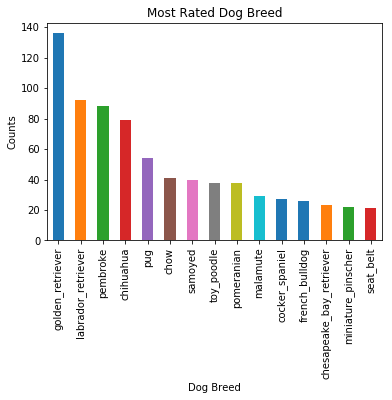

In [73]:
dog_breed.plot(kind='bar')
plt.title('Most Rated Dog Breed')
plt.xlabel('Dog Breed')
plt.ylabel('Counts')

### Most Popular Life Stage

In [74]:
life_stage = df.dog_life_stage.value_counts()
life_stage.to_frame()

,dog_life_stage
pupper,237
doggo,81
puppo,30
floofer,4


Text(0,0.5,'Counts')

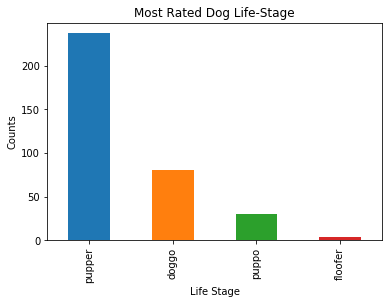

In [75]:
life_stage.plot('bar')
plt.title('Most Rated Dog Life-Stage')
plt.xlabel('Life Stage')
plt.ylabel('Counts')

### Most Popular Dog Name

In [76]:
dog_name = df.name.value_counts().head(10)
dog_name.to_frame()

,name
Charlie,13
Oliver,11
Lucy,10
Cooper,10
Tucker,9
Winston,8
Penny,8
Daisy,8
Lola,8
Bailey,6


Text(0,0.5,'Counts')

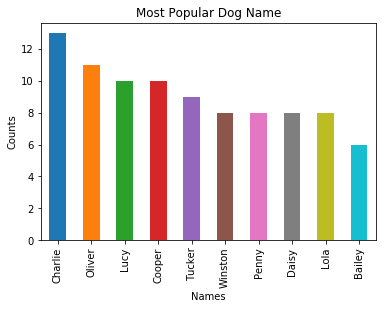

In [77]:
dog_name.plot('bar')
plt.title('Most Popular Dog Name')
plt.xlabel('Names')
plt.ylabel('Counts')

### Tweets over the time
Visualizing the total number of tweets over time to see whether that number increases, or decreases, over time.

In [78]:
df.timestamp = pd.to_datetime(df['timestamp'], format='%Y-%m-%d %H:%M:%S.%f')

monthly_tweets = df.groupby(pd.Grouper(key = 'timestamp', freq = "M")).count().reset_index()
monthly_tweets = monthly_tweets[['timestamp', 'tweet_id']]
monthly_tweets.head()
monthly_tweets.sum()

tweet_id    2159
dtype: int64

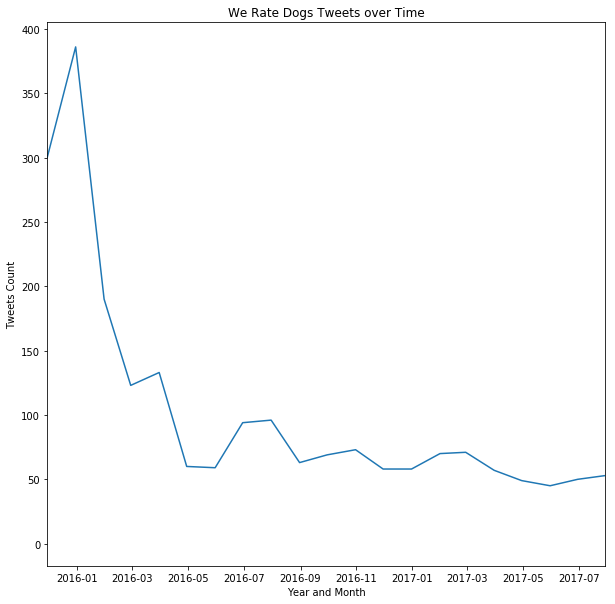

In [79]:
# Plotting time vs. tweets

plt.figure(figsize=(10, 10));
plt.xlim([datetime.date(2015, 11, 30), datetime.date(2017, 7, 30)]);

plt.xlabel('Year and Month')
plt.ylabel('Tweets Count')

plt.plot(monthly_tweets.timestamp, monthly_tweets.tweet_id);
plt.title('We Rate Dogs Tweets over Time');

### Retwwet Count vs. Favorite Count
Relation between retweet counts and favourite counts

Text(-8.7,0.5,'Retweet Count')

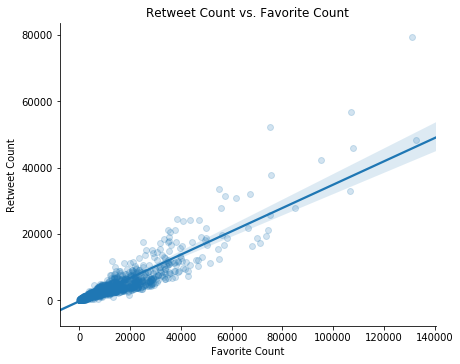

In [80]:
sns.lmplot(x="favorite_count", 
           y="retweet_count", 
           data=df,
           size = 5,
           aspect=1.3,
           scatter_kws={'alpha':1/5});

#plt.title('Favorite Count vs. Retweet Count');
#plt.xlabel('Retweet Count');
#plt.ylabel('Favorite Count');

#sns.lmplot(x="favorite_count", y="retweet_count", 
#           data=df)
#plt.scatter(df.retweet_count, df.favorite_count, alpha=0.2)
plt.title('Retweet Count vs. Favorite Count')
plt.xlabel('Favorite Count')
plt.ylabel('Retweet Count')